# Scatterplot of lap times across 2025 sessions

This is an exploration of lap times, and tire types, for pre-race sessions (practice and qualification) for the 2025
Barcelona Grand Prix.

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

driver = 'PIA'
race = 'Barcelona'
season = 2025

In [39]:
# Get FP1 data
fp1 = fastf1.get_session(season, race, 'FP1')
fp1.load()
fp1_laps = fp1.laps.pick_quicklaps().reset_index()

# Get FP2 data
fp2 = fastf1.get_session(season, race, 'FP2')
fp2.load()
fp2_laps = fp2.laps.pick_quicklaps().reset_index()

# Get FP3 data
fp3 = fastf1.get_session(season, race, 'FP3')
fp3.load()
fp3_laps = fp3.laps.pick_quicklaps().reset_index()

# Get quali data
q = fastf1.get_session(season, race, 'Q')
q.load()
q_laps = q.laps.pick_quicklaps().reset_index()

# Get race data
r = fastf1.get_session(season, race, 'R')
r.load()
r_laps = r.laps.reset_index()


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
events      WARNING 	Correcting user input 'Barcelona' to 'Bahrain Grand Prix'
core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '5', '6', '7', '

In [40]:
print(f"FP1: {fp1_laps['LapTime'].min()}   {fp1_laps['LapTime'].max()}")
print(f"FP2: {fp2_laps['LapTime'].min()}   {fp2_laps['LapTime'].max()}")
print(f"FP3: {fp3_laps['LapTime'].min()}   {fp3_laps['LapTime'].max()}")

FP1: 0 days 00:01:33.204000   0 days 00:01:39.696000
FP2: 0 days 00:01:12.760000   0 days 00:01:16.187000
FP3: 0 days 00:01:12.387000   0 days 00:01:17.408000


In [41]:
# fp3_laps has some quality problems, so we filter out laps that have been flagged to a temporary collection.
temp_laps = fp3_laps.where(fp3_laps['IsAccurate'] == True)

In [42]:
temp_laps

,index,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,0 days 00:01:55.273000,NOR,4,0 days 00:01:16.168000,6.0,2.0,NaT,NaT,0 days 00:00:22.725000,...,False,McLaren,0 days 00:00:39.105000,2025-05-31 10:54:02.420,1,NaN,False,,False,True
2,6.0,0 days 00:03:11.548000,NOR,4,0 days 00:01:16.275000,7.0,2.0,NaT,NaT,0 days 00:00:22.830000,...,False,McLaren,0 days 00:01:55.273000,2025-05-31 10:55:18.588,1,NaN,False,,False,True
3,7.0,0 days 00:04:27.518000,NOR,4,0 days 00:01:15.970000,8.0,2.0,NaT,NaT,0 days 00:00:22.718000,...,False,McLaren,0 days 00:03:11.548000,2025-05-31 10:56:34.863,1,NaN,False,,False,True
4,12.0,0 days 00:25:32.343000,NOR,4,0 days 00:01:12.913000,13.0,4.0,NaT,NaT,0 days 00:00:21.649000,...,False,McLaren,0 days 00:24:19.430000,2025-05-31 11:17:42.745,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
69,302.0,0 days 00:09:52.586000,PIA,81,0 days 00:01:14.805000,6.0,2.0,NaT,NaT,0 days 00:00:22.217000,...,False,McLaren,0 days 00:08:37.781000,2025-05-31 11:02:01.096,1,NaN,False,,False,True
70,303.0,0 days 00:11:08.719000,PIA,81,0 days 00:01:16.133000,7.0,2.0,NaT,NaT,0 days 00:00:22.622000,...,False,McLaren,0 days 00:09:52.586000,2025-05-31 11:03:15.901,1,NaN,False,,False,True
71,304.0,0 days 00:12:24.892000,PIA,81,0 days 00:01:16.173000,8.0,2.0,NaT,NaT,0 days 00:00:22.516000,...,False,McLaren,0 days 00:11:08.719000,2025-05-31 11:04:32.034,1,NaN,False,,False,True


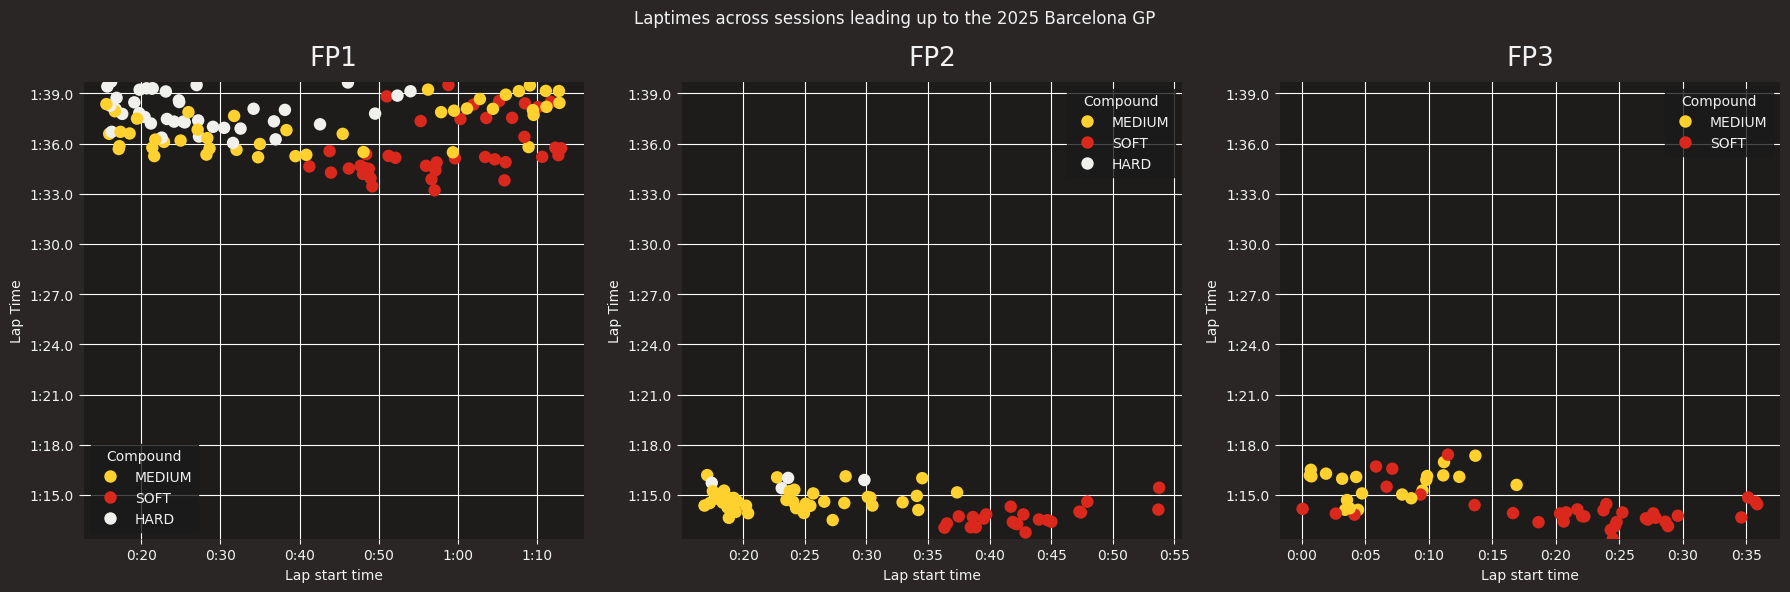

In [43]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Lap times in practice and qualification for 2025 Monaco GP')

sns.scatterplot(data=fp1_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp1),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=fp2_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp2),
                s=80,
                linewidth=0,
                legend='auto'
)

# As I build this notebook, there is a problem with FP3 data, so we're using the filtered temp_laps object.
sns.scatterplot(data=temp_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax3,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp3),
                s=80,
                linewidth=0,
                legend='auto'
)

# Set common y-axis limits
common_ylim = (fp1_laps['LapTime'].max(), fp3_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
ax2.set_ylim(common_ylim)
ax3.set_ylim(common_ylim)

ax1.set_title("FP1")
ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax2.set_title("FP2")
ax2.set_xlabel("Lap start time")
ax2.set_ylabel("Lap Time")

ax3.set_title("FP3")
ax3.set_xlabel("Lap start time")
ax3.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

plt.suptitle(f"Laptimes across sessions leading up to the 2025 {race} GP")

# Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')
ax2.grid(color='w', which='major', axis='both')
ax3.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

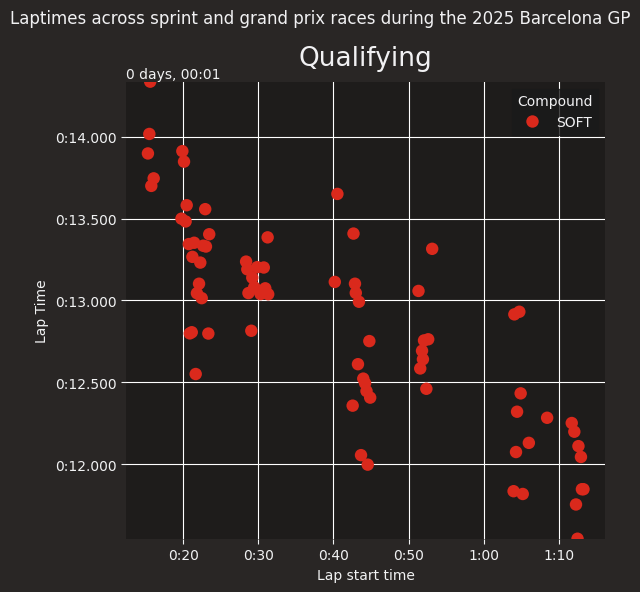

In [44]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(data=q_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=q),
                s=80,
                linewidth=0,
                legend='auto'
)

common_ylim = (q_laps['LapTime'].max(), q_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
# ax2.set_ylim(common_ylim)

ax1.set_title("Qualifying")
ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax1.invert_yaxis()

# # Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.suptitle(f"Laptimes across sprint and grand prix races during the 2025 {race} GP")
plt.tight_layout()
plt.show()


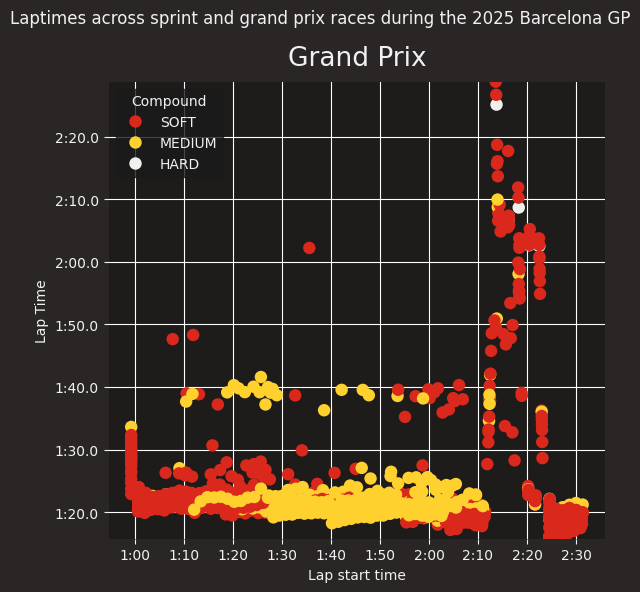

In [45]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(data=r_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=r),
                s=80,
                linewidth=0,
                legend='auto'
)

common_ylim = (r_laps['LapTime'].max(), r_laps['LapTime'].min())
ax1.set_ylim(common_ylim)

ax1.set_title("Grand Prix")
ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax1.invert_yaxis()

# # Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.suptitle(f"Laptimes across sprint and grand prix races during the 2025 {race} GP")
plt.tight_layout()
plt.show()


---

This is the end of the notebook.